<span>
<b>Methods Workshop in Quantitative Text Analysis </b><br/>     
<b>Author:</b> <a href="https://github.com/jisukimmmm">Jisu Kim</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Last update:</b> 21/05/2024
</span>

<a id='top'></a>
# *Advanced Text analysis in Python - Unsupervised ML*




## Table of Contents

1. [PCA](#pca)<br>
2. [Clusters](#cluster)<br>
2.1 [K-means](#kmeans)<br>
2.2 [Mcluster](#mcluster)<br>
2.3 [Hierarchical clustering](#hierarchical)<br>
3. [Co-occurrencce matrix](#cooccur)<br>
4. [Word embeddings](#word)<br>
4.1 [Word2Vec](#word)<br>
5. [Similarity](#similarity)<br>
6. [Pointwise Mutual Information](#PMI)<br>
7. [Topic Modelling](#topic)<br>
7.1. [Latent Semantic Analysis](#LSA)<br>
7.2. [Latent Dirichlet Allocation](#LDA)<br>


# Load libaries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

<a id='pca'></a>
### PCA ([to top](#pca))
>
Below is an example code demonstrating how to use PCA (Principal Component Analysis) to reduce the dimensionality of text data. The principal components are vectors that define the directions of maximum variance in the data. Each component is a combination of the original features (in this case, the terms from the TF-IDF matrix). The values in these vectors represent the contribution of each original feature to the component.
>
>The first principal component has high positive values for indices corresponding to terms like "Machine learning," "artificial intelligence," and "natural language processing." These terms contribute significantly to this component. E.g., The first term ("Machine learning") has a coefficient of approximately 0.218, positive coefficient mean that higher values of that term contribute positively to the principal component. The second principal component has high positive and negative values for different terms, indicating a different direction of variance in the data.
>
>The first principal component explains about 45.27% of the variance.
The second principal component explains about 21.81% of the variance.
>Together, these two components capture around 67% of the total variance in the data. This means that the two-dimensional representation retains a significant portion of the information present in the original high-dimensional space.
>
>The first document has coordinates (-0.416, -0.029) in the new space.
The second document has coordinates (-0.417, 0.087) in the new space.
>
>Documents that are close to each other in the plot have similar TF-IDF representations. For example, documents 1 and 2 are close, they share more terms in common compared to others.
>
>A larger distance between documents indicates that they are more different in terms of their TF-IDF representations. For example, document 3 is far from document 1, it means their term usage is quite different.

Principal components:
[[ 0.21803727 -0.13263621 -0.15670861  0.21803727  0.21803727 -0.13263621
   0.21803727 -0.15795003  0.13212187 -0.15670861 -0.17756296  0.28250619
  -0.26654925 -0.17756296  0.28250619 -0.29955858  0.28250619 -0.29955858
   0.21803727  0.13212187  0.21803727 -0.13263621]
 [-0.22065286 -0.19732404 -0.02288168 -0.22065286 -0.22065286 -0.19732404
  -0.22065286  0.06872176  0.43693508 -0.02288168  0.16081819  0.17449513
   0.19953483  0.16081819  0.17449513 -0.10145057  0.17449513 -0.10145057
  -0.22065286  0.43693508 -0.22065286 -0.19732404]]

Explained variance ratio:
[0.45265707 0.21810917]

Transformed data:
[[-0.41639325 -0.02929566]
 [-0.41707779  0.0874372 ]
 [ 0.3962926   0.63148462]
 [-0.39556916 -0.28355997]
 [ 0.83274761 -0.4060662 ]]


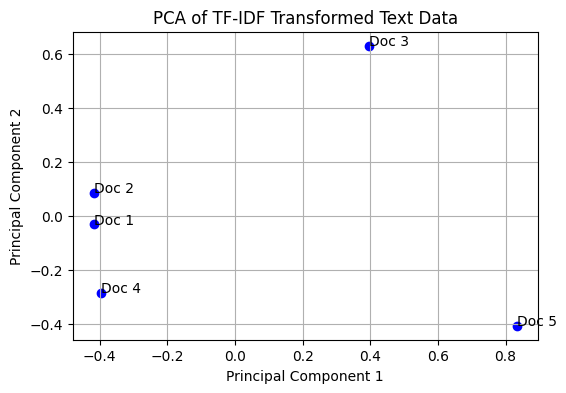

In [3]:
from sklearn.decomposition import PCA

# Dummy text data
documents = [
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning is a subset of machine learning.",
    "Natural language processing is used in machine learning.",
    "Computer vision is another subset of machine learning.",
    "Text data can be analyzed using natural language processing.",
]

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()  #Convert a collection of raw documents to a matrix of TF-IDF features.
X = vectorizer.fit_transform(documents)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Print the principal components
print("Principal components:")
print(pca.components_)

# Print the explained variance ratio
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

# Print the transformed data
print("\nTransformed data:")
print(X_pca)

# Plot the PCA results
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')

for i, txt in enumerate(documents):
    plt.annotate(f"Doc {i+1}", (X_pca[i, 0], X_pca[i, 1]))

plt.title('PCA of TF-IDF Transformed Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [38]:
print(X.shape) # number of rows and columns in the matrix.

(5, 22)


<a id='cluster'></a>
## 2. Clusters ([to top](#cluster))
>


<a id='kmeans'></a>
### 2.1 K-means clustering ([to top](#kmeans))
>
K-means clustering is an algorithm used for document clustering. It groups similar documents together based on their feature vectors, allowing for the discovery of natural clusters within the text corpus.

In [3]:
# %pip install adjustText

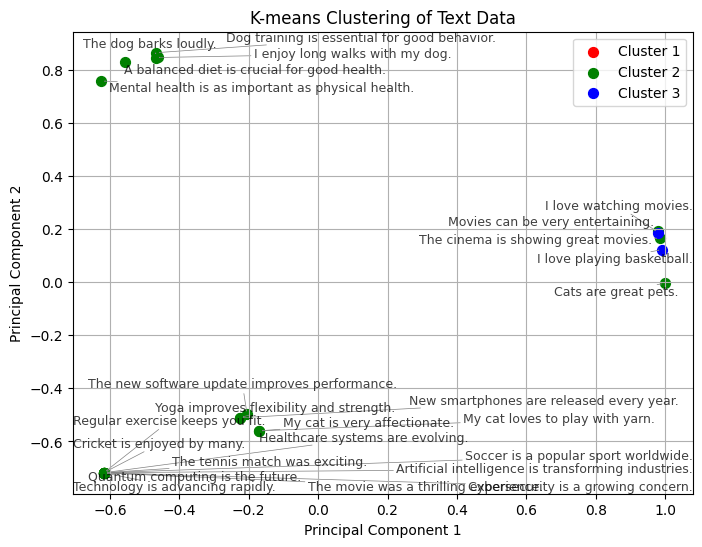

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from adjustText import adjust_text

# Example text corpus
corpus = [
    "I love watching movies.",
    "The dog barks loudly.",
    "Cats are great pets.",
    "Movies can be very entertaining.",
    "I enjoy long walks with my dog.",
    "My cat loves to play with yarn.",
    "The cinema is showing great movies.",
    "Dog training is essential for good behavior.",
    "My cat is very affectionate.",
    "The movie was a thrilling experience.",
    "Technology is advancing rapidly.",
    "New smartphones are released every year.",
    "Artificial intelligence is transforming industries.",
    "Quantum computing is the future.",
    "Cybersecurity is a growing concern.",
    "The new software update improves performance.",
    "I love playing basketball.",
    "Soccer is a popular sport worldwide.",
    "The tennis match was exciting.",
    "Cricket is enjoyed by many.",
    "Yoga improves flexibility and strength.",
    "A balanced diet is crucial for good health.",
    "Regular exercise keeps you fit.",
    "Mental health is as important as physical health.",
    "Healthcare systems are evolving."
]

# Step 1: Text Preprocessing and TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

# Step 2: K-means Clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Step 3: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Normalize the data for better visualization
X_pca = normalize(X_pca)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(k):
    points = X_pca[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Annotate the points with the original text
texts = []
for i, text in enumerate(corpus):
    texts.append(plt.annotate(text, (X_pca[i, 0], X_pca[i, 1]), fontsize=9, alpha=0.75))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.title("K-means Clustering of Text Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


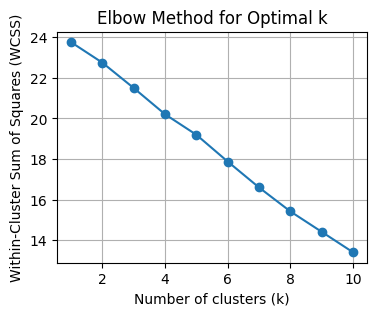

In [6]:
# Calculate WCSS for different k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(4,3))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


1: Indicates that the clusters are well apart from each other and clearly distinguished. <br>
0: Indicates that the clusters are very close to each other and overlapping.<br>
-1: Indicates that the clusters are assigned incorrectly.<br>

Given the optimal silhouette score of 0.045 at 8 clusters, it means that while the clustering might not be perfect (since 0.045 is relatively low), it is the best among the options you've tested. This suggests that with your specific dataset, 8 clusters are the most appropriate.

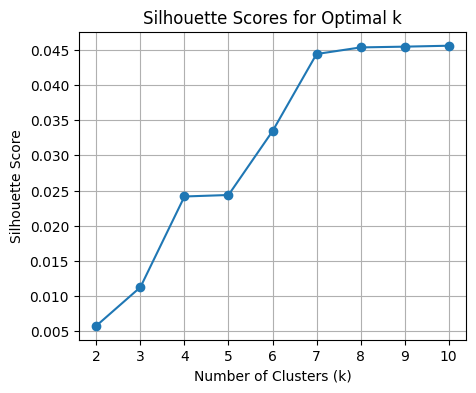

In [7]:
from sklearn.metrics import silhouette_score

# Step 2: K-means Clustering and Silhouette Score Calculation
silhouette_scores = []
range_k = range(2, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 3: Plotting the Silhouette Scores
plt.figure(figsize=(5, 4))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Let's replot the K-Means clusters with 8 clusters:

Silhouette Score for 8 clusters: 0.04536427085352212


C:\Users\Kim\AppData\Local\Temp\ipykernel_20580\3683371078.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')


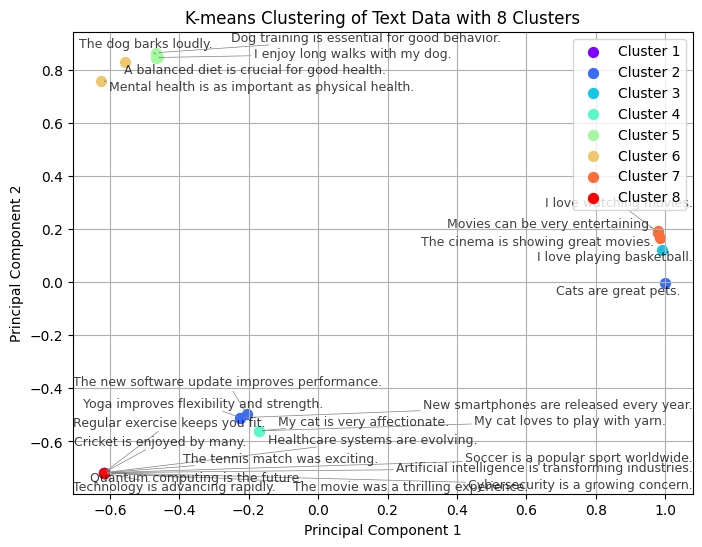

In [8]:
# Step 2: K-means Clustering with 8 Clusters
k = 8  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Step 3: Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Normalize the data for better visualization
X_pca = normalize(X_pca)

# Plot the clustered data points
plt.figure(figsize=(8,6))
colors = plt.cm.rainbow(np.linspace(0, 1, k))
for i in range(k):
    points = X_pca[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Annotate the points with the original text
texts = []
for i, text in enumerate(corpus):
    texts.append(plt.annotate(text, (X_pca[i, 0], X_pca[i, 1]), fontsize=9, alpha=0.75))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.title("K-means Clustering of Text Data with 8 Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


<a id='mcluster'></a>
### 1.3 M-cluster ([to top](#mcluster))
>
The text data is converted into numerical features using the TF-IDF vectorizer. The stop_words='english' parameter removes common English stop words, and max_features=1000 limits the number of features to 1000 for simplicity. (If not None, build a vocabulary that only consider the top  `max_features` ordered by term frequency across the corpus   Otherwise, all features are used.)
>We initialize a GaussianMixture model with 3 components (clusters) and fit it to the TF-IDF features.The model predicts the cluster labels for each document.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocess the text data and convert to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(corpus).toarray()

# Apply the Gaussian Mixture Model for clustering
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Print clusters labels
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
for i in range(n_clusters):
    print(f"{cluster_labels[i]}:")
    for j, label in enumerate(corpus):
        if gmm_labels[j] == i:
            print(f"- {label}")
    print()

Cluster 1:
- My cat loves to play with yarn.
- The movie was a thrilling experience.

Cluster 2:
- The dog barks loudly.
- Cats are great pets.
- I enjoy long walks with my dog.
- Dog training is essential for good behavior.
- My cat is very affectionate.
- Technology is advancing rapidly.
- New smartphones are released every year.
- Artificial intelligence is transforming industries.
- Quantum computing is the future.
- Cybersecurity is a growing concern.
- The new software update improves performance.
- I love playing basketball.
- Soccer is a popular sport worldwide.
- The tennis match was exciting.
- Cricket is enjoyed by many.
- Yoga improves flexibility and strength.
- A balanced diet is crucial for good health.
- Regular exercise keeps you fit.
- Mental health is as important as physical health.
- Healthcare systems are evolving.

Cluster 3:
- I love watching movies.
- Movies can be very entertaining.
- The cinema is showing great movies.



In [22]:
# Evaluate the clustering using Adjusted Rand Index
true_labels = [0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4] #0:Entertainment, 1:Pets, 2: Technology, 3: Sports, 4:Health
ari = adjusted_rand_score(true_labels, gmm_labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Evaluate the clustering using Silhouette Score
sil_score = silhouette_score(X, gmm_labels)
print(f"Silhouette Score: {sil_score:.2f}")

Adjusted Rand Index: 0.02
Silhouette Score: 0.01


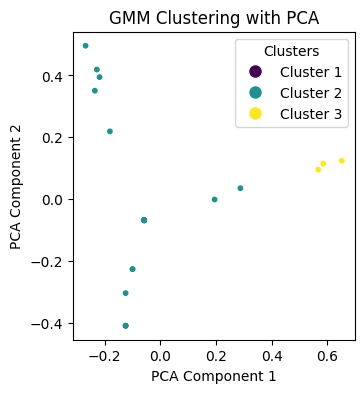

In [23]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title('GMM Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Create legend
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(n_clusters)]
plt.legend(handles, legend_labels, title="Clusters", loc='upper right')

plt.show()

<a id='hierarchical'></a>
### 1.4 Hierarchical clustering ([to top](#hierarchical))
>
Hierarchical clustering organises data points into a hierarchy of clusters.

"distance" represents a measure of dissimilarity between points (or clusters of points) in the dataset. When clustering text data, this distance typically corresponds to the differences in their feature representations, such as TF-IDF vectors.

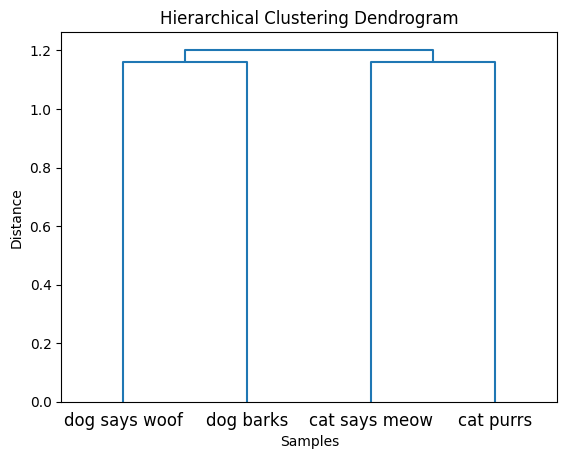

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Example corpus
corpus = ["cat says meow", "dog says woof", "cat purrs", "dog barks"]

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

# Hierarchical clustering
Z = linkage(X, 'single')

# Dendrogram
dendrogram(Z, labels=corpus)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


<a id='cooccur'></a>
## 3. Co-occurrencce matrix ([to top](#cooccur))
>
A co-occurrence matrix is a square matrix that represents the frequency of co-occurrence of terms in a given text corpus. Each row and column of the matrix corresponds to a unique term in the vocabulary, and the value at the intersection of row $i$ and column $j$ indicates how often term $i$ and term $j$ appear together within a specified context window or document.

0: "cat"
1: "says"
2: "meow"
3: "dog"
4: "woof"
5: "purrs"
6: "barks"

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
# Example corpus
corpus = ["cat says meow", "dog says woof", "cat purrs", "dog barks"]

[[0 0 1 0 0 0 0]
 [0 0 0 1 1 1 0]
 [1 0 0 0 0 1 1]
 [0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0]
 [0 1 1 1 0 0 1]
 [0 0 1 0 0 1 0]]


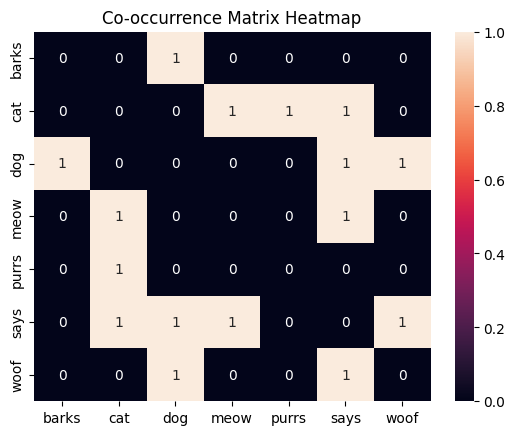

In [27]:
# Create co-occurrence matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
Xc = (X.T * X)
Xc.setdiag(0)
co_occurrence = Xc.toarray()
print(co_occurrence)

# Plot heatmap
sns.heatmap(co_occurrence, annot=True, xticklabels=vectorizer.get_feature_names_out(), yticklabels=vectorizer.get_feature_names_out())
plt.title("Co-occurrence Matrix Heatmap")
plt.show()

<a id='word'></a>
## 4. Word embeddings ([to top](#word))
>
Word embeddings represent words as dense vector representations in a continuous vector space. It learns distributed representations of words based on their context in a large corpus of text. Word embeddings capture semantic relationships between words and are useful for tasks like semantic similarity and text classification.
>
>The following script demonstrates the use of Word2Vec models to calculate the cosine similarity between words in a given text corpus. Word2Vec is a popular technique in natural language processing (NLP) used to represent words as dense vectors in a continuous vector space. By training Word2Vec models on a corpus of text data, we can capture semantic relationships between words and measure their similarity.
>
>In this script, we utilize the gensim library to train two types of Word2Vec models: Continuous Bag of Words (CBOW) and Skip Gram. We tokenize a mock text corpus using the nltk library and then train the Word2Vec models on the tokenized data. Subsequently, we calculate the cosine similarity between selected word pairs in the trained models to evaluate their semantic similarity. By comparing the cosine similarity scores obtained from CBOW and Skip Gram models, we gain insights into how different training approaches affect the representation of word meanings in the vector space.
>
>A cosine similarity value of 1 indicates that the two vectors are identical, while a value of 0 indicates that they are orthogonal (i.e., unrelated).

In [9]:
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
import warnings

warnings.filterwarnings(action='ignore')

# Mock text for testing Word2Vec models
sample_text = """
This is a sample text used for testing Word2Vec models. 
The quick brown fox jumps over the lazy dog. 
The dog barks loudly while the cat quietly observes. 
In the world of machines, artificial intelligence is gaining prominence. 
However, natural language processing remains a challenging task. 
Word embeddings play a crucial role in various NLP applications.
"""

In [10]:
# Replaces escape character with space
f = sample_text.replace("\n", " ")

data = []

# iterate through each sentence in the text
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

In [11]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)

# Print results
print("Cosine similarity between 'sample' " +
      "and 'text' - CBOW : ",
      model1.wv.similarity('sample', 'text'))

print("Cosine similarity between 'sample' " +
      "and 'machines' - CBOW : ",
      model1.wv.similarity('sample', 'machines'))

Cosine similarity between 'sample' and 'text' - CBOW :  0.107487
Cosine similarity between 'sample' and 'machines' - CBOW :  0.05547755


In [12]:
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)

# Print results
print("Cosine similarity between 'sample' " +
      "and 'text' - Skip Gram : ",
      model2.wv.similarity('sample', 'text'))

print("Cosine similarity between 'sample' " +
      "and 'machines' - Skip Gram : ",
      model2.wv.similarity('sample', 'machines'))

Cosine similarity between 'sample' and 'text' - Skip Gram :  0.10711049
Cosine similarity between 'sample' and 'machines' - Skip Gram :  0.055530574


<a id='similarity'></a>
## 5. Similarity ([to top](#similarity))
>


[[1.         0.20199309]
 [0.20199309 1.        ]]


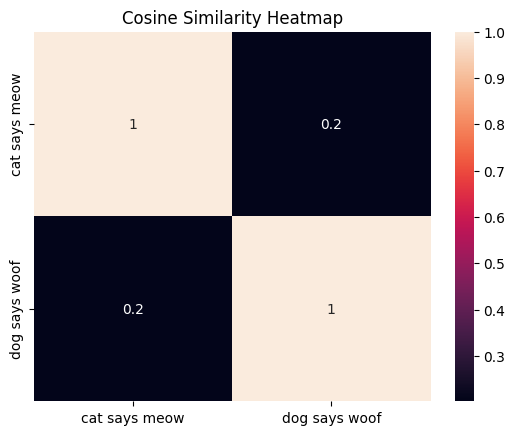

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Example corpus
corpus = ["cat says meow", "dog says woof"]

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Compute cosine similarity
similarity = cosine_similarity(X)
print(similarity)

# Plot heatmap
sns.heatmap(similarity, annot=True, xticklabels=corpus, yticklabels=corpus)
plt.title("Cosine Similarity Heatmap")
plt.show()


Given the cosine similarity value of 0.202 between the two documents "cat says meow" and "dog says woof", it indicates a relatively low level of similarity between these two documents. Interpreting cosine similarity:
>
>Cosine similarity ranges from -1 to 1, where 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates perfect dissimilarity.
>
>In this case, the cosine similarity value of approximately 0.202 suggests that the two documents share some similarity in terms of their content, but it's not particularly strong.
>
>Since the cosine similarity value is closer to 0, it implies that the documents have differences in their content, vocabulary, or structure.

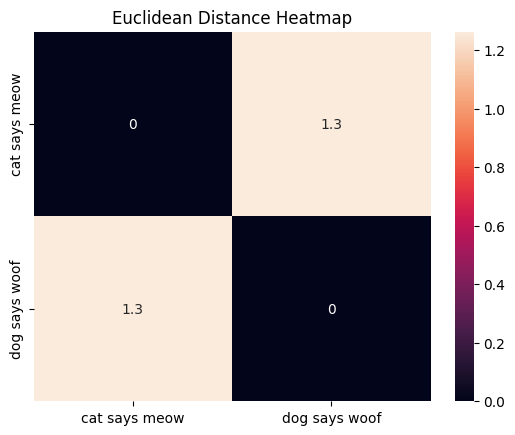

In [21]:
from sklearn.metrics.pairwise import pairwise_distances
# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Compute Euclidean distance
distance = pairwise_distances(X, metric='euclidean')

# Plot heatmap
sns.heatmap(distance, annot=True, xticklabels=corpus, yticklabels=corpus)
plt.title("Euclidean Distance Heatmap")
plt.show()


The values on the heatmap represent the pairwise distances between the sentences. Lower values indicate greater similarity (closer proximity), while higher values indicate greater dissimilarity (farther apart). In this case, a distance of 0 indicates perfect similarity, while a distance of 1.3 indicates some degree of dissimilarity.<br>
The sentences "The cat says meow" and "The dog says woof" have a Euclidean distance of 1.3, suggesting they are somewhat dissimilar.

<a id='PMI'></a>
## 6. Pointwise Mutual Information ([to top](#PMI))
>
PMI is a measure of the association between two words, indicating how much more likely they co-occur than if they were independent.<br>
In the PMI matrix:
> Each row and column corresponds to a word in your vocabulary. In this case, the vocabulary consists of ["cat", "says", "meow", "dog", "woof"]. <br>
>The value at position (i, j) in the matrix represents the PMI between word i and word j.

Here's how to interpret the values:<br>
>A value of 0 indicates that the two words have no association.<br>
>Positive values indicate a positive association, meaning the words co-occur more frequently than expected by chance.<br>
>>A PMI value greater than 1 indicates that the co-occurrence of the two words is more frequent than would be expected by chance.<br>

>Negative values indicate a negative association, meaning the words co-occur less frequently than expected by chance.<br>



In [74]:
from nltk import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
from nltk.tokenize import word_tokenize

# Example corpus
corpus = ["cat says meow", "dog says woof"]

# Tokenize the corpus into words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Flatten the list of tokenized sentences into a single list of words
all_words = [word for sentence in tokenized_corpus for word in sentence]

# Create a BigramCollocationFinder from the tokenized corpus
finder = BigramCollocationFinder.from_words(all_words)

# Calculate PMI for each bigram
pmi_scores = finder.score_ngrams(BigramAssocMeasures.pmi)

# Print the PMI scores for each bigram
for bigram, pmi in pmi_scores:
    print(bigram, round(pmi, 2))


('meow', 'dog') 2.58
('cat', 'says') 1.58
('dog', 'says') 1.58
('says', 'meow') 1.58
('says', 'woof') 1.58


In [70]:
# %pip install networkx

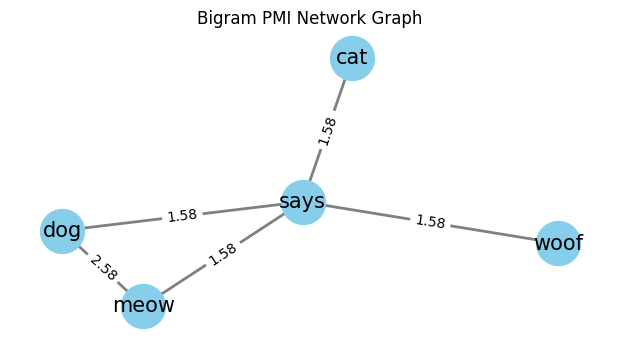

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes (words) to the graph
for sentence in tokenized_corpus:
    for word in sentence:
        G.add_node(word)

# Add edges (bigrams) to the graph with weights based on PMI scores
for bigram, pmi in pmi_scores:
    word1, word2 = bigram
    if word1 in G.nodes and word2 in G.nodes:
        G.add_edge(word1, word2, weight=round(pmi, 2))

# Draw the graph
plt.figure(figsize=(6, 3))
pos = nx.spring_layout(G, seed=42)  # Define the layout of the graph
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=15, font_color='black', width=2, edge_color='gray', edge_cmap=plt.cm.Blues, arrows=False)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Bigram PMI Network Graph')
plt.show()


<a id='topic'></a>
# 7. Topic Modelling ([to top](#topic))
>


<a id='LSA'></a>
## 7.1 Latent Semantic Analysis ([to top](#LSA))
>
Latent Semantic Analysis (LSA) is a technique used to analyze the relationships between a set of documents and the terms they contain. LSA assumes that words that appear in similar contexts tend to have similar meanings.

[[ 0.72053478 -0.43011994]
 [ 0.72053478  0.43011994]
 [ 0.47662983 -0.65022446]
 [ 0.47662983  0.65022446]]


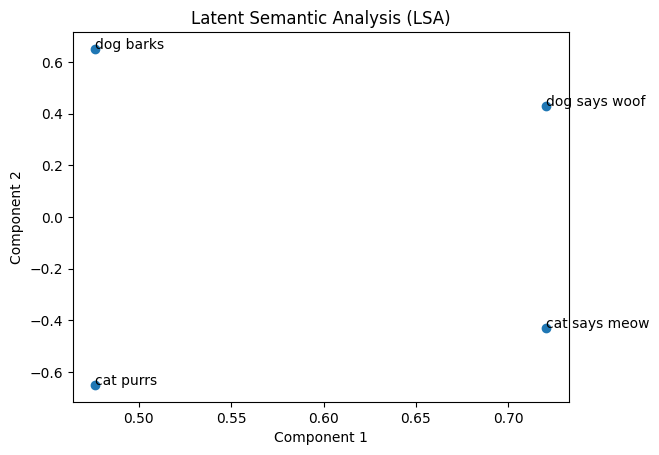

In [15]:
from sklearn.decomposition import TruncatedSVD

# Example corpus
corpus = ["cat says meow", "dog says woof", "cat purrs", "dog barks"]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# LSA
lsa = TruncatedSVD(n_components=2)
X_lsa = lsa.fit_transform(X)
print(X_lsa)


# Scatter plot
plt.scatter(X_lsa[:, 0], X_lsa[:, 1])

for i, txt in enumerate(corpus):
    plt.annotate(txt, (X_lsa[i, 0], X_lsa[i, 1]))

plt.title("Latent Semantic Analysis (LSA)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


The result shows the matrix of document-topic (or document-concept) associations generated by Latent Semantic Analysis (LSA). <br>
Each row corresponds to a document in the corpus, and each column corresponds to a latent topic or concept.<br>
The values in the matrix represent the strength of association between each document and each topic.<br>

>Higher values indicate a stronger association between a document and a topic, suggesting that the document is more likely to discuss that topic.<br>
>Negative values indicate an inverse association between a document and a topic, suggesting that the document is less likely to discuss that topic.<br>

Therefore, it suggests that "cat says meow" and "dog says woof" are more similar to each other in terms of the latent topics captured by component 1, and similarly, "dog barks" and "cat purrs" are more similar to each other.

<a id='LDA'></a>
## 7.2 Latent Dirichlet Allocation ([to top](#LDA))
>
LDA is a generative probabilistic model used for topic modeling in text analysis. It assumes that each document is a mixture of topics, and each topic is a probability distribution over words. <br>
>



Topic #0:
dog says woof barks purrs


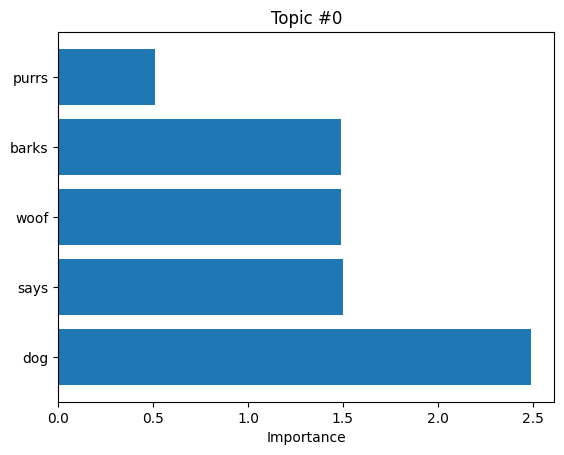

Topic #1:
cat says meow purrs barks


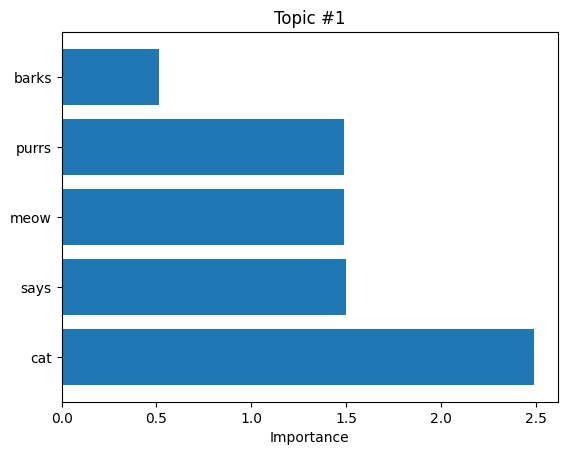

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Example corpus
corpus = ["cat says meow", "dog says woof", "cat purrs", "dog barks"]

# Count Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# LDA
lda = LatentDirichletAllocation(n_components=2, random_state=0) #n_components :  Number of topics. int, default=10 
X_lda = lda.fit_transform(X)

# Visualize the topics
n_top_words = 5
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    plt.barh(np.arange(n_top_words), topic[topic.argsort()[:-n_top_words - 1:-1]], align='center')
    plt.yticks(np.arange(n_top_words), [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    plt.xlabel('Importance')
    plt.title(f'Topic #{topic_idx}')
    plt.show()


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Example corpus
corpus = ["cat says meow", "dog says woof", "cat purrs", "dog barks"]

# Count Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Convert the document-term matrix to a Gensim corpus
corpus_gensim = [list(zip(range(len(vectorizer.vocabulary_)), doc)) for doc in X.toarray()]

# Split data into training and test sets
corpus_train, corpus_test = train_test_split(corpus_gensim, test_size=0.2, random_state=0)

# Create Gensim dictionary
dictionary = Dictionary.from_corpus(corpus_train, id2word={idx: token for token, idx in vectorizer.vocabulary_.items()})

# Train LDA model
lda_model = LdaModel(corpus=corpus_train, id2word=dictionary, num_topics=2, random_state=0)

# Compute log-likelihood of the test set
log_likelihood = lda_model.log_perplexity(corpus_test)

# Calculate perplexity: A higher perplexity value indicates poorer model performance, as it suggests that the model is less able to predict the test data.
perplexity = np.exp(-log_likelihood)
print(f"Perplexity: {perplexity}")

# Visualize the topics
for topic_idx in range(lda_model.num_topics):
    print(f"Topic #{topic_idx}: {lda_model.print_topic(topic_idx)}")

# Compute coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus_gensim, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_score}")


Perplexity: 91.10284445932537
Topic #0: 0.241*"dog" + 0.217*"says" + 0.148*"woof" + 0.145*"barks" + 0.103*"cat" + 0.092*"meow" + 0.055*"purrs"
Topic #1: 0.198*"meow" + 0.182*"cat" + 0.174*"says" + 0.136*"dog" + 0.115*"barks" + 0.110*"woof" + 0.086*"purrs"
Coherence Score: nan
